# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
#Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import numpy as np
import pandas as pd
from pprint import pprint
from citipy import citipy
from scipy.stats import linregress

from config import api_key

## Generate Cities List

In [64]:
#Generate and store pairs of coordinates - limited range to -50 to 70 as cities outside of these ranges are rare and I did
#not want these to be over represented. 
longs = np.random.uniform(low=-180, high=180, size=1200)
lats = np.random.uniform(low=-50, high=70, size=1200)
coordinates = tuple(zip(lats, longs))

In [65]:
city_list = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in city_list:
            city_list.append(city)
print(city_list[0:10])

['sabang', 'nikolskoye', 'tigil', 'pasighat', 'kavieng', 'lahat', 'buchanan', 'broken hill', 'busselton', 'miri']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
city = city_list[0]
units = 'imperial'
query_url = f'http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&units={units}&q='
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 95.3214, 'lat': 5.8933},
 'weather': [{'id': 502,
   'main': 'Rain',
   'description': 'heavy intensity rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 83.01,
  'feels_like': 88.68,
  'temp_min': 83.01,
  'temp_max': 83.01,
  'pressure': 1007,
  'humidity': 71,
  'sea_level': 1007,
  'grnd_level': 1005},
 'visibility': 10000,
 'wind': {'speed': 8.81, 'deg': 248, 'gust': 8.95},
 'rain': {'1h': 6.48},
 'clouds': {'all': 100},
 'dt': 1631697861,
 'sys': {'country': 'ID', 'sunrise': 1631662171, 'sunset': 1631705924},
 'timezone': 25200,
 'id': 1214026,
 'name': 'Sabang',
 'cod': 200}

In [68]:
#Generate list of cities using randomised coordinates

#Create lists
lat = []
long = []
long = []
temp_f = []
humidity = []
cloudiness = []
wind_speeds = []
cities = []
country = []
date = []
city_number = 0

#Define url and units
units = 'imperial'
query_url = f'http://api.openweathermap.org/data/2.5/weather?&appid={api_key}&units={units}&q='


for city in city_list:
    try:
        response = requests.get(query_url + city).json()

    #Append results to lists
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp_f.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        date.append(response['dt'])
        cities.append(city)
        country.append(response['sys']['country'])
        city_number += 1
        
    #Print outcome if city found
        print(f'City Number: {city_number}, City Name: {city}')
    
    #Print outcome if city not found
    except KeyError:
        print(f'{city} - city not found')


City Number: 1, City Name: sabang
City Number: 2, City Name: nikolskoye
City Number: 3, City Name: tigil
City Number: 4, City Name: pasighat
City Number: 5, City Name: kavieng
City Number: 6, City Name: lahat
City Number: 7, City Name: buchanan
City Number: 8, City Name: broken hill
City Number: 9, City Name: busselton
City Number: 10, City Name: miri
City Number: 11, City Name: luderitz
City Number: 12, City Name: posadas
vaitupu - city not found
City Number: 13, City Name: ulladulla
City Number: 14, City Name: jamestown
City Number: 15, City Name: inongo
City Number: 16, City Name: mataura
City Number: 17, City Name: ponta do sol
City Number: 18, City Name: kavaratti
City Number: 19, City Name: montepulciano
City Number: 20, City Name: bilibino
City Number: 21, City Name: lubbock
City Number: 22, City Name: san quintin
City Number: 23, City Name: darhan
City Number: 24, City Name: lebu
City Number: 25, City Name: almeria
City Number: 26, City Name: pisco
City Number: 27, City Name: m

City Number: 209, City Name: cradock
City Number: 210, City Name: bathsheba
City Number: 211, City Name: whitehorse
City Number: 212, City Name: marsh harbour
City Number: 213, City Name: sakakah
City Number: 214, City Name: concordia
City Number: 215, City Name: constitucion
City Number: 216, City Name: san jeronimo
aflu - city not found
City Number: 217, City Name: suicheng
City Number: 218, City Name: progreso
City Number: 219, City Name: brae
City Number: 220, City Name: alofi
City Number: 221, City Name: kolpashevo
City Number: 222, City Name: adrar
umzimvubu - city not found
City Number: 223, City Name: south valley
City Number: 224, City Name: ketchikan
City Number: 225, City Name: pereslavl-zalesskiy
City Number: 226, City Name: isangel
City Number: 227, City Name: thompson
City Number: 228, City Name: mount gambier
City Number: 229, City Name: cadiz
City Number: 230, City Name: sorong
City Number: 231, City Name: cape town
City Number: 232, City Name: marawi
City Number: 233, 

City Number: 412, City Name: sciacca
City Number: 413, City Name: kosino
City Number: 414, City Name: khatanga
City Number: 415, City Name: ust-kuyga
City Number: 416, City Name: hokitika
City Number: 417, City Name: jaicos
chagda - city not found
katsiveli - city not found
City Number: 418, City Name: diamantina
azimur - city not found
City Number: 419, City Name: rabo de peixe
City Number: 420, City Name: atar
City Number: 421, City Name: vila
City Number: 422, City Name: ucluelet
City Number: 423, City Name: honiara
City Number: 424, City Name: haines junction
City Number: 425, City Name: mankono
City Number: 426, City Name: pangoa
City Number: 427, City Name: laguna
City Number: 428, City Name: high prairie
City Number: 429, City Name: jimenez
City Number: 430, City Name: sassandra
City Number: 431, City Name: estelle
City Number: 432, City Name: malinovskiy
City Number: 433, City Name: napasar
City Number: 434, City Name: amga
City Number: 435, City Name: sete lagoas
toliary - cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
#Create dataframe using list of cities
weather_df = pd.DataFrame({"City":cities, "Country": country, "Latitude":lat, "Longitude": long, "Cloudiness":cloudiness, 
                           "Humidity":humidity, "Temperature":temp_f, "Wind Speed":wind_speeds})
weather_df['City'] = weather_df['City'].str.title()
weather_df.head()

,City,Country,Latitude,Longitude,Cloudiness,Humidity,Temperature,Wind Speed
0,Sabang,ID,5.8933,95.3214,100,71,83.01,8.81
1,Nikolskoye,RU,59.7035,30.7861,94,93,44.49,8.14
2,Tigil,RU,57.8000,158.6667,8,82,40.08,3.38
3,Pasighat,IN,28.0667,95.3333,26,55,93.09,4.07
4,Kavieng,PG,-2.5744,150.7967,99,78,80.80,25.99


In [73]:
#Save DataFrame as CSV
weather_df.to_csv('Output_CSV/weather_df.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [74]:
#Determine if any cities have humidity >100%
weather_df.describe()

,Latitude,Longitude,Cloudiness,Humidity,Temperature,Wind Speed
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,18.788267,15.580955,51.229342,69.740304,67.337774,7.486560
std,32.193315,91.649430,39.388545,22.360000,16.260203,5.111889
min,-53.150000,-179.166700,0.000000,5.000000,23.360000,0.000000
25%,-8.257800,-64.326000,8.000000,57.000000,54.000000,3.580000
50%,25.263100,18.423200,54.000000,76.000000,70.210000,6.200000
75%,46.433300,99.759800,91.000000,87.000000,79.650000,10.600000
max,72.786800,179.316700,100.000000,100.000000,102.610000,25.990000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

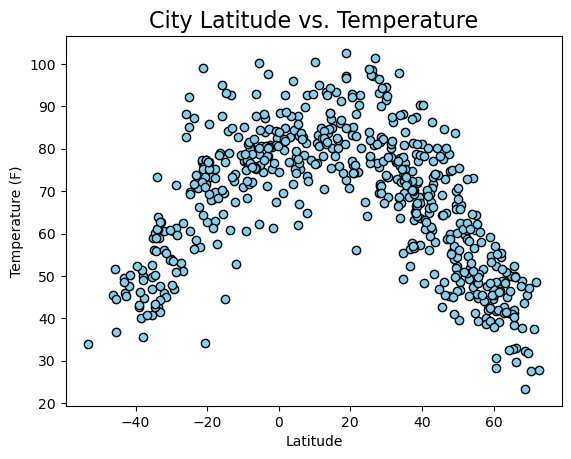

In [75]:
plt.scatter(weather_df["Latitude"],weather_df["Temperature"], edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Temperature", size="16")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Plots/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

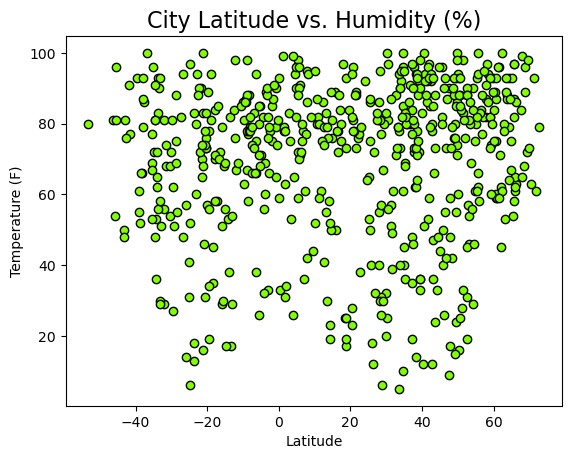

In [87]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"], cmap="BlYlRd", edgecolors="black",facecolors="chartreuse")
plt.title("City Latitude vs. Humidity (%)", size="16")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Plots/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

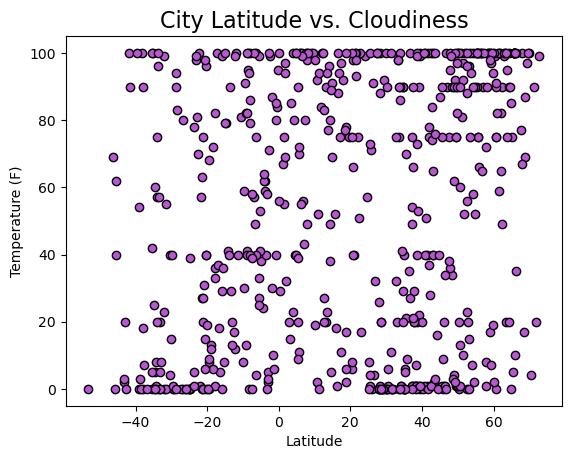

In [77]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"], cmap="BlYlRd", edgecolors="black",facecolors="mediumorchid")
plt.title("City Latitude vs. Cloudiness", size="16")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Plots/lat_vs_clouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

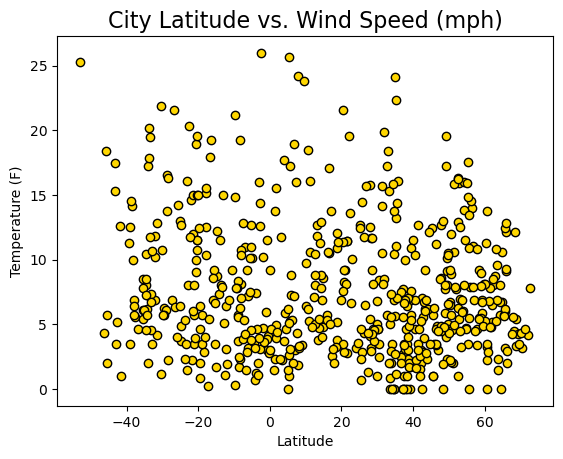

In [78]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"], cmap="BlYlRd", edgecolors="black",facecolors="gold")
plt.title("City Latitude vs. Wind Speed (mph)", size="16")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Plots/lat_vs_wind.png")
plt.show()

## Linear Regression

In [79]:
#Split into northern and souther hemisphere DataFrames
southern_df = weather_df.loc[(weather_df['Latitude']<0)]
northern_df = weather_df.loc[(weather_df['Latitude']>=0)]

In [80]:
#Set base function for all linear regression plots
def linear_regression(x_values, y_values, y_title, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    fig1, ax1 = plt.subplots(figsize=(6, 4))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    #Set and format title and axis label
    plt.title(f'{y_title} vs Latitude\n{hemisphere} Hemisphere',fontsize =14)
    plt.xlabel("Latitude",fontsize =12)
    plt.ylabel(y_title,fontsize =12)
    
    #Print r value
    print(f"The r-squared for the {hemisphere} Hemisphere is: {rvalue**2}")
    plt.savefig(f"Plots/{hemisphere}_Hemisphere_{y_title}_vs_Latitude.png")
    
    #Generate plot
    plt.show()

The r-squared for the Northern Hemisphere is: 0.6269349861805665


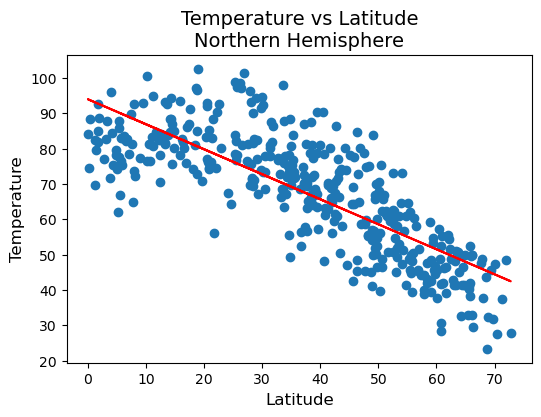

The r-squared for the Southern Hemisphere is: 0.5788506506444683


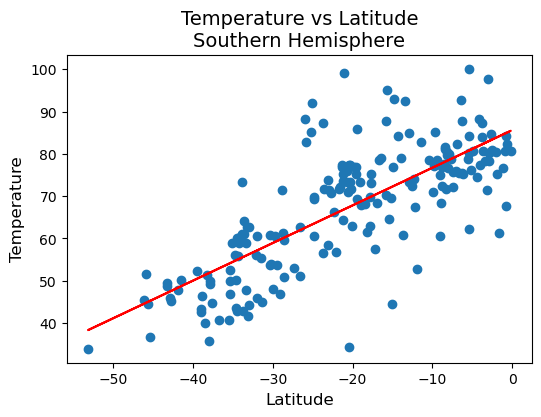

In [81]:
#linear regression plots, Northern vs Southern Hempishphere for latitude vs temperature
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
linear_regression(x_values, y_values, 'Temperature', 'Northern')

x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
linear_regression(x_values, y_values, 'Temperature', 'Southern')

In [82]:
#Analysis
#With both r values around 0.6, there is  moderately strong correlation between temperature and latitude in both hemishperes. 
#Although there does appear to be a greater range in temperatures between -25 and -10 degrees latitude, futher analysis would be
#required to confirm if this is in fact the case. From running multiple versions, this has not always been the case so 
#I am wary of reading to much into this.

The r-squared for the Northern Hemisphere is: 0.011148136032003939


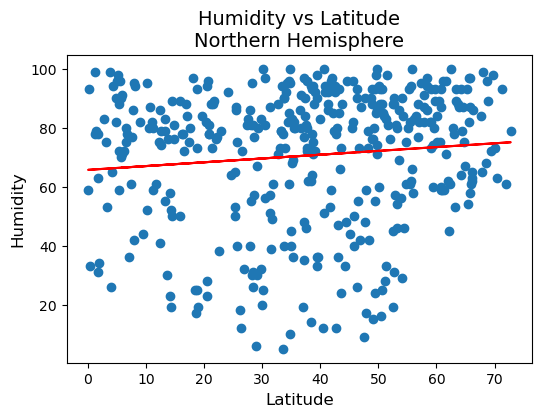

The r-squared for the Southern Hemisphere is: 0.004487765951879895


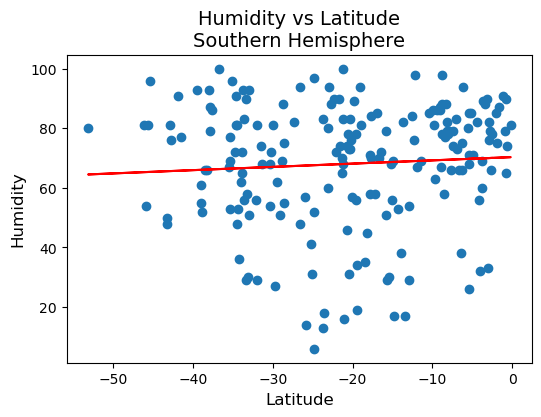

In [83]:
#linear regression plots, Northern vs Southern Hempishphere for latitude vs humidity
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
linear_regression(x_values, y_values, 'Humidity', 'Northern')

x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
linear_regression(x_values, y_values, 'Humidity', 'Southern')

In [ ]:
#With r values under 0.01 there is no correltaion between humidity and latitude. However, it is apparent that for latitudes
#under -40 and above 55 degrees, there are no humidities under 40%. This could make sense as cold air has a lesser ability to 
#retain mositure than warm air. To investigate this I ran temp vs humidity and although there was more of a correlation, 
#particularly, in the northern hemisphere which had an r value = 0.2, any relationship is still a very weak relationship. 

The r-squared for the Northern Hemisphere is: 0.008007909438271113


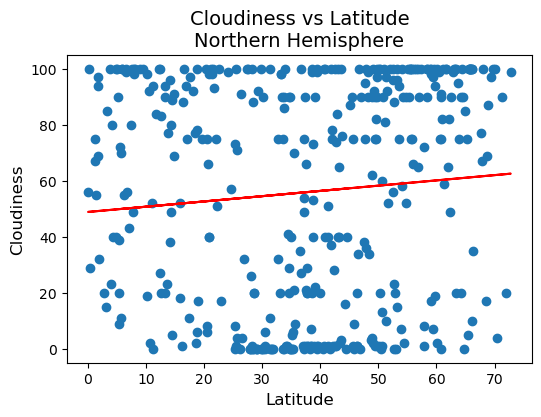

The r-squared for the Southern Hemisphere is: 0.05177446625322655


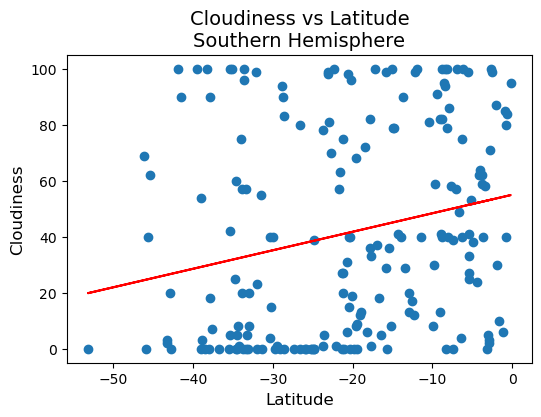

In [84]:
#linear regression plots, Northern vs Southern Hempishphere for latitude vs cloudiness
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
linear_regression(x_values, y_values, 'Cloudiness', 'Northern')

x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
linear_regression(x_values, y_values, 'Cloudiness', 'Southern')

In [ ]:
#With r values = 0.05 or under, their does not appear to be a cvorrelation between cloudiness and latitude. However, what is
#observale, particularly for the northern hemisphere plot, is a tendency for either no cloud or full cloud,rather than all data
#points beng evenly dispersed. For cities with no cloud, these appear to mostly be situated between latitudes between -20 and
#-40 and 25 and 50 degrees. My thoughts on this are that the greater landmasses are situated between these ranges of latitude
#with more inland areas which would be less prone to cloudiness. However, again, further analysis would be required to confirm
#this hypothesis. 

The r-squared for the Northern Hemisphere is: 0.006048756721853078


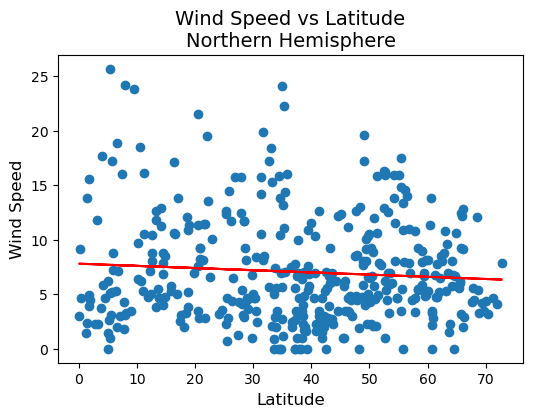

The r-squared for the Southern Hemisphere is: 0.030699401119123407


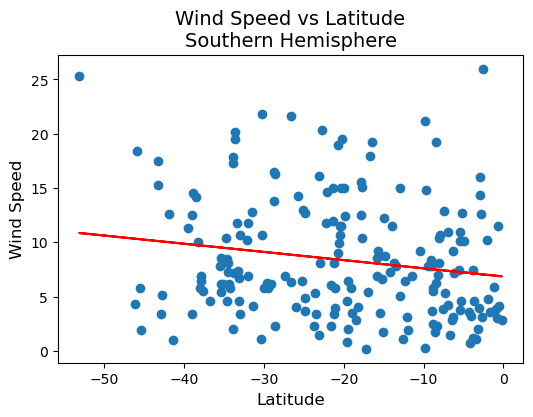

In [85]:
#linear regression plots, Northern vs Southern Hempishphere for latitude vs wind speed
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
linear_regression(x_values, y_values, 'Wind Speed', 'Northern')

x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
linear_regression(x_values, y_values, 'Wind Speed', 'Southern')

In [ ]:
# with r values of 0.03 or less, there is no correlation between latitde and wind speed. Given that temperature is the main 
#cause of wind, and their is a correltion between temperature and latitude, one may have anticiapted some relationship 
#between latitidfue and wind. However, as it is actually the variation of temperature between adjacent areas that that 
#causes wind rather than just a low or high temperature, it is actually not unexpected that there isn't a correlation 
#between wind and latitude. 